In [1]:
import pandas as pd
import numpy as np

In [2]:
git = "https://raw.githubusercontent.com/LiyaT3/Data_Files/main/BA%20Assignment%20Walmart%20Sales.xlsx"
data = pd.read_excel(git)

In [3]:
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4


In [4]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [6]:
data.describe()

,Unit price,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270
std,26.494628,2.923431,1.71858
min,10.080000,1.000000,4.00000
25%,32.875000,3.000000,5.50000
50%,55.230000,5.000000,7.00000
75%,77.935000,8.000000,8.50000
max,99.960000,10.000000,10.00000


In [ ]:
#Sales generated and the Revenue can be taken as one

In [7]:
data['Sales'] = data['Unit price'] * data['Quantity']

In [9]:
performance = data.groupby(['Branch', 'City']).agg(Total_Sales=("Sales", "sum"))

Total_Sales
Branch City                  
A      Mandalay      34130.09
       Naypyitaw     35985.64
       Yangon        33647.27
B      Mandalay      37215.93
       Naypyitaw     35157.75
       Yangon        35193.51
C      Mandalay      29794.62
       Naypyitaw     34160.14
       Yangon        32302.43

In [11]:
total_qty = data.groupby(['Branch', 'City']).agg(Total_Quantity_Sold=("Quantity", "sum"))

Total_Quantity_Sold
Branch City                          
A      Mandalay                   637
       Naypyitaw                  648
       Yangon                     598
B      Mandalay                   664
       Naypyitaw                  604
       Yangon                     631
C      Mandalay                   519
       Naypyitaw                  579
       Yangon                     630

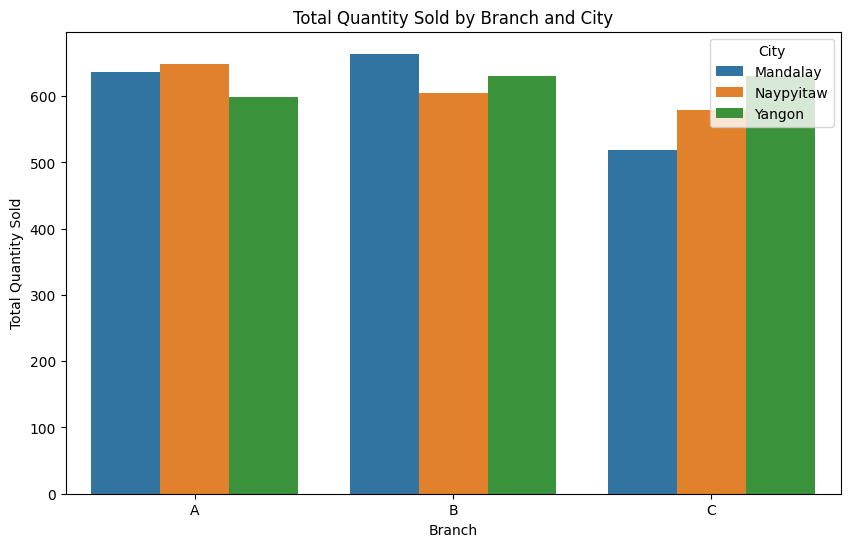

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total_Quantity_Sold', hue='City', data=total_qty)
plt.title('Total Quantity Sold by Branch and City')
plt.xlabel('Branch')
plt.ylabel('Total Quantity Sold')
plt.legend(title='City')
plt.show()

In [13]:
avg_price = data.groupby(['Branch', 'City']).agg(Average_Price=("Unit price", "mean"))

Average_Price
Branch City                    
A      Mandalay       53.353866
       Naypyitaw      54.123182
       Yangon         55.639298
B      Mandalay       56.133305
       Naypyitaw      57.785688
       Yangon         56.011062
C      Mandalay       57.958316
       Naypyitaw      57.941009
       Yangon         52.684602

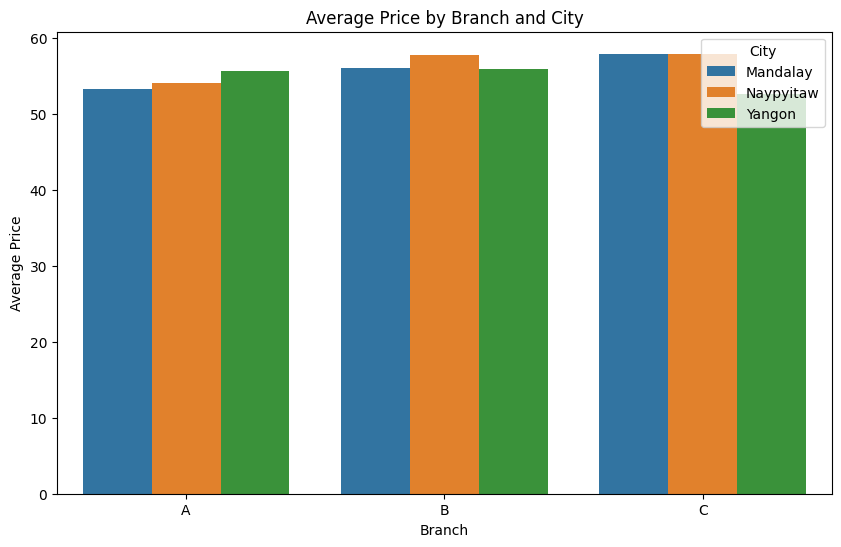

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Average_Price', hue='City', data=avg_price)
plt.title('Average Price by Branch and City')
plt.xlabel('Branch')
plt.ylabel('Average Price')
plt.legend(title='City')
plt.show()

In [18]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Month']= data['Date'].dt.strftime('%B')

990       March
991     January
992       March
993    February
994    February
995     January
996       March
997    February
998    February
999    February
Name: Month, dtype: object

In [32]:
unq = data['Month'].unique()

array(['January', 'March', 'February'], dtype=object)

In [27]:
monthly_perf =pd.DataFrame( data.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg({'Sales': 'sum'}))

,Month,Product line,Gender,Payment,Sales
0,February,Electronic accessories,Female,Cash,5189.16
1,February,Electronic accessories,Female,Credit card,2542.08
2,February,Electronic accessories,Female,Ewallet,2395.43
3,February,Electronic accessories,Male,Cash,1590.25
4,February,Electronic accessories,Male,Credit card,3145.49
...,...,...,...,...,...
103,March,Sports and travel,Female,Credit card,2863.86
104,March,Sports and travel,Female,Ewallet,3398.57
105,March,Sports and travel,Male,Cash,2084.19
106,March,Sports and travel,Male,Credit card,3633.90


<ipython-input-29-9d02a8d608c5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Month', y='Sales', hue='Product line', col='Gender', row='Payment', kind='bar', data=monthly_perf, height=4, aspect=1.5, ci=None)


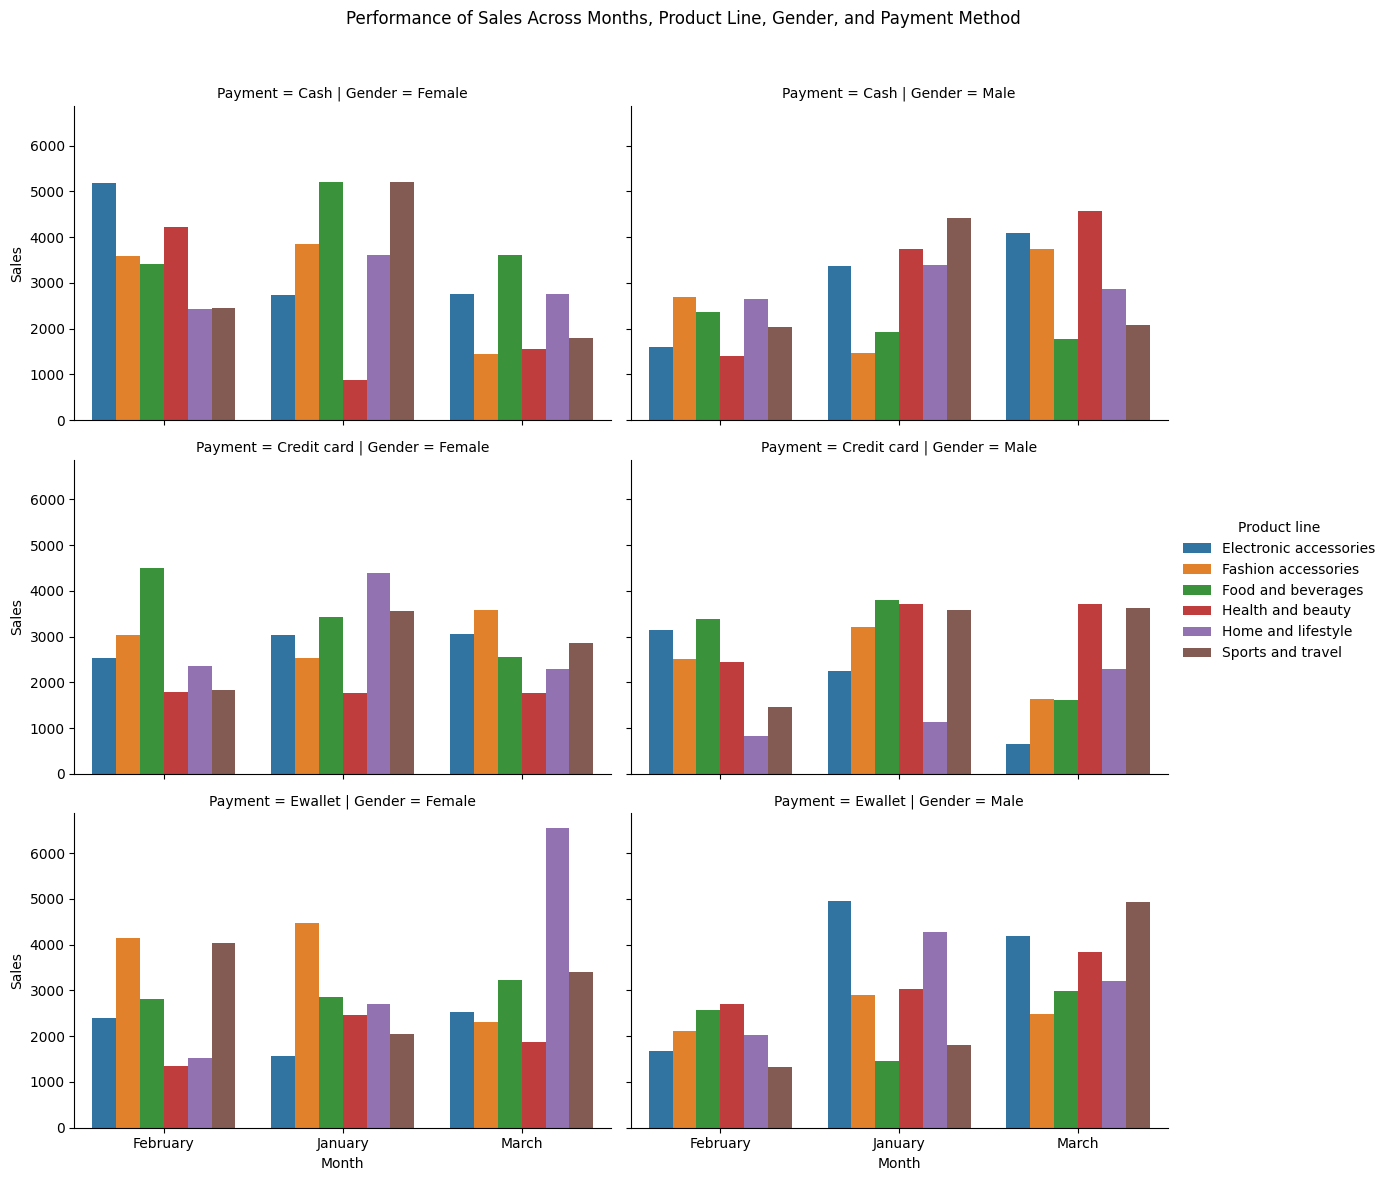

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='Month', y='Sales', hue='Product line', col='Gender', row='Payment', kind='bar', data=monthly_perf, height=4, aspect=1.5, ci=None)
plt.subplots_adjust(top=0.9)
plt.suptitle('Performance of Sales Across Months, Product Line, Gender, and Payment Method')
plt.show()

In [ ]:
"""
Female :
Electronics: Cash and credit are preferred, leading to robust sales.
Fashion: Ewallet and credit are favored, resulting in significant sales.
Food: All payment methods (cash, ewallet, and credit) are equally preferred, driving strong sales.
Home and Lifestyle: All payment methods (cash, ewallet, and credit) are equally favored, leading to solid sales.
Sports: Credit and ewallet are preferred, contributing to substantial sales.
"""

In [ ]:
"""
Male:
Electronics: Cash and ewallet are preferred payment methods, driving strong sales.
Fashion: Cash and ewallet are preferred payment methods, resulting in significant sales.
Food: Ewallet and credit are preferred payment methods, contributing to higher sales.
Health: All three payment methods (cash, ewallet, and credit) are preferred, leading to solid sales performance.
Home: Cash and ewallet are preferred payment methods, resulting in robust sales.
Sports: Ewallet is the preferred payment method, driving substantial sales.
"""

In [ ]:
"""
Targeted marketing will identify preferred payment methods for specific customer demographics (gender) and
product categories. By offering incentives and discounts for using these preferred methods, we can encourage
sales and steer customers towards desired payment options. Additionally, inventory management will ensure
sufficient stock for product categories where specific payment methods are popular, preventing lost sales
opportunities.
"""